In [22]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np



In [23]:
# Baixando a planilha do Football Data
df1 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2324/D1.csv')
df2 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2223/D1.csv')
df3 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2122/D1.csv')
df = [df1, df2, df3]
df = pd.concat(df)

In [24]:
# Selecionando as Colunas que serão utilizadas
df = df[['Date','HomeTeam','AwayTeam','B365H','B365D','B365A','FTHG','FTAG','FTR']]

# Renomenando as Colunas
df.columns = ['Date','Home','Away','OddsHome','OddsDraw','OddsAway','HomeGoals','AwayGoals','Result']

In [25]:
# Visualizando o DataFrame
df

,Date,Home,Away,OddsHome,OddsDraw,OddsAway,HomeGoals,AwayGoals,Result
0,18/08/2023,Werder Bremen,Bayern Munich,7.50,6.50,1.30,0,4,A
1,19/08/2023,Augsburg,M'gladbach,2.70,3.60,2.45,4,4,D
2,19/08/2023,Hoffenheim,Freiburg,2.30,3.60,2.90,1,2,A
3,19/08/2023,Leverkusen,RB Leipzig,2.45,3.60,2.75,3,2,H
4,19/08/2023,Stuttgart,Bochum,1.65,4.33,4.50,5,0,H
...,...,...,...,...,...,...,...,...,...
301,14/05/2022,Mainz,Ein Frankfurt,1.70,4.33,4.33,2,2,D
302,14/05/2022,M'gladbach,Hoffenheim,2.00,4.33,3.10,5,1,H
303,14/05/2022,Stuttgart,FC Koln,2.20,4.00,2.87,2,1,H
304,14/05/2022,Union Berlin,Bochum,1.40,5.00,7.00,3,2,H


In [26]:
# Ajustando o Índice
df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº do Jogo'])
df = df.rename(index=lambda x: x + 1)

In [27]:
# Visualizando o DataFrame
df

,Date,Home,Away,OddsHome,OddsDraw,OddsAway,HomeGoals,AwayGoals,Result
Nº do Jogo,,,,,,,,,
1,18/08/2023,Werder Bremen,Bayern Munich,7.50,6.50,1.30,0,4,A
2,19/08/2023,Augsburg,M'gladbach,2.70,3.60,2.45,4,4,D
3,19/08/2023,Hoffenheim,Freiburg,2.30,3.60,2.90,1,2,A
4,19/08/2023,Leverkusen,RB Leipzig,2.45,3.60,2.75,3,2,H
5,19/08/2023,Stuttgart,Bochum,1.65,4.33,4.50,5,0,H
...,...,...,...,...,...,...,...,...,...
914,14/05/2022,Mainz,Ein Frankfurt,1.70,4.33,4.33,2,2,D
915,14/05/2022,M'gladbach,Hoffenheim,2.00,4.33,3.10,5,1,H
916,14/05/2022,Stuttgart,FC Koln,2.20,4.00,2.87,2,1,H


In [28]:
# Perdas e Lucros - Back Linear
win_Back_H = 1 * df.OddsHome - 1
win_Back_D = 1 * df.OddsDraw - 1
win_Back_A = 1 * df.OddsAway - 1
lose = -1

df['Back_H'] = win_Back_H.where(df.Result == 'H', other=lose)
df['Back_D'] = win_Back_D.where(df.Result == 'D', other=lose)
df['Back_A'] = win_Back_A.where(df.Result == 'A', other=lose)

<Axes: title={'center': 'Back Home'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

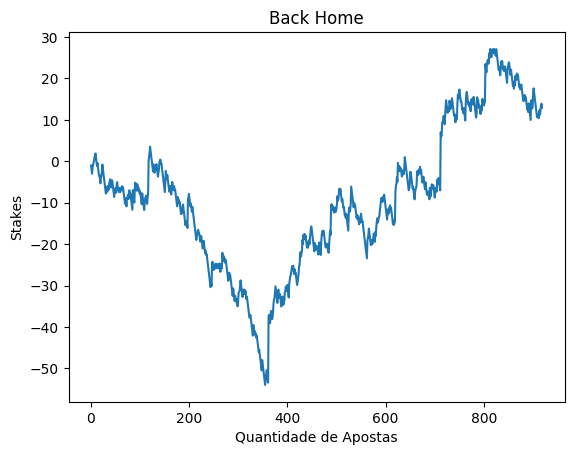

In [29]:
# Back Home
df['BackHome_acu'] = df.Back_H.cumsum()
df.BackHome_acu.plot(title='Back Home', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Back Draw'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

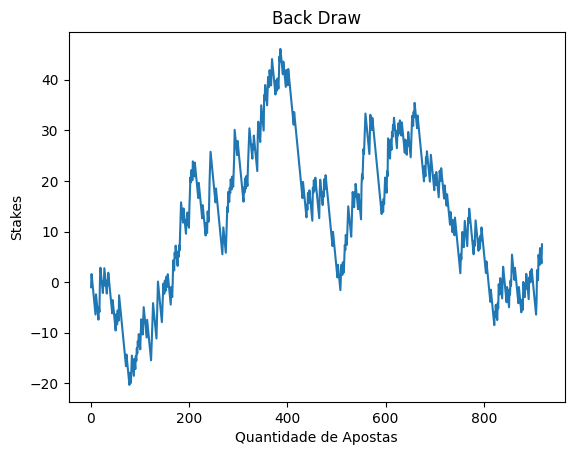

In [30]:
# Back Draw
df['BackDraw_acu'] = df.Back_D.cumsum()
df.BackDraw_acu.plot(title='Back Draw', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Back Away'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

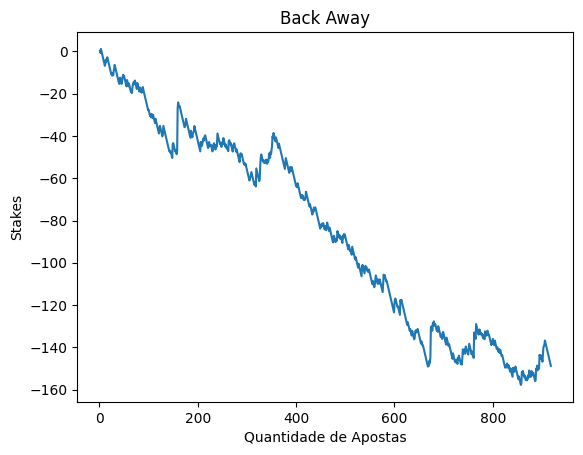

In [31]:
# Back Away
df['BackAway_acu'] = df.Back_A.cumsum()
df.BackAway_acu.plot(title='Back Away', xlabel='Quantidade de Apostas', ylabel='Stakes')

In [32]:
# Perdas e Lucros - Lay Linear
win_Lay_H = 1 / (df.OddsHome - 0.99)
win_Lay_D = 1 / (df.OddsDraw - 0.99)
win_Lay_A = 1 / (df.OddsAway - 0.99)
lose = -1

df['Lay_H'] = win_Lay_H.where(df.Result != 'H', other=lose)
df['Lay_D'] = win_Lay_D.where(df.Result != 'D', other=lose)
df['Lay_A'] = win_Lay_A.where(df.Result != 'A', other=lose)

<Axes: title={'center': 'Lay Home'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

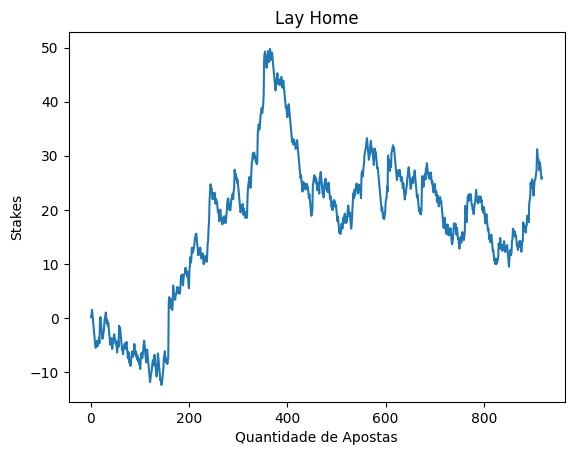

In [33]:
# Lay Home
df['LayHome_acu'] = df.Lay_H.cumsum()
df.LayHome_acu.plot(title='Lay Home', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Lay Draw'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

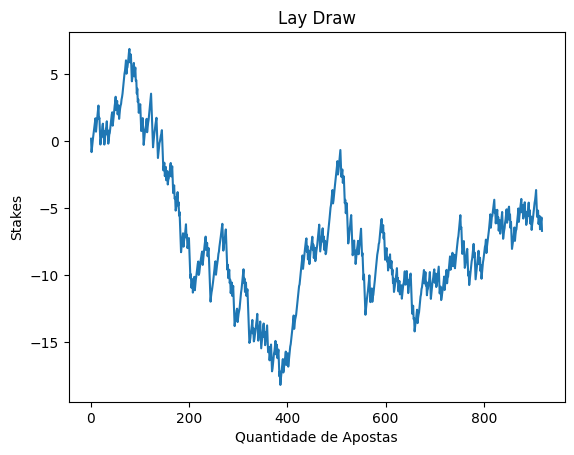

In [34]:
# Lay Draw
df['LayDraw_acu'] = df.Lay_D.cumsum()
df.LayDraw_acu.plot(title='Lay Draw', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Lay Away'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

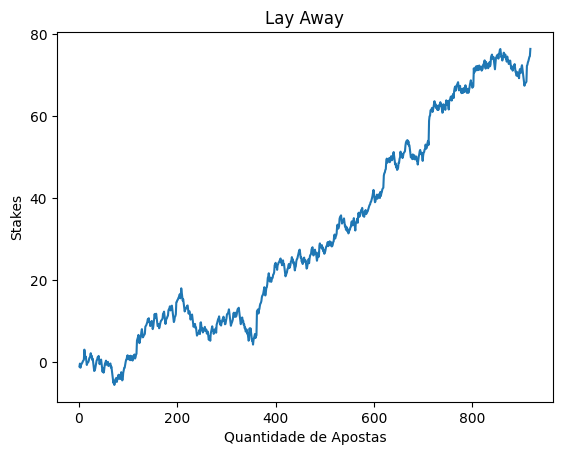

In [35]:
# Lay Away
df['LayAway_acu'] = df.Lay_A.cumsum()
df.LayAway_acu.plot(title='Lay Away', xlabel='Quantidade de Apostas', ylabel='Stakes')